# Exploratory Data Analysis

In [43]:
import numpy as np
import pandas as pd
import os
import time

from datetime import datetime
from matplotlib import pyplot
from scipy import stats

## Ensuring reproducibility

In [26]:
CUSTOM_SEED = 42
np.random.seed(CUSTOM_SEED)

## Read Dataset

In [27]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [28]:
path = '../dataset/Air quality/'
names = ["No",  "year",  "month",  "day",  "hour",  "PM2.5",  "PM10",  "SO2",  "NO2",  "CO",  "O3",  "TEMP",  "PRES",  "DEWP",  "RAIN",  "wd",  "WSPM",  "station"]
dataset = pd.read_csv(path + 'Air quality.csv',  names=names)
dataset

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,5844,2013,10,30,11,41,49,19,51.1197,700,6,13.2,1022.4,-0.1,0,NE,1.4,Wanliu
1,27824,2016,5,3,7,15,26,2,11,300,72,15.5,993.5,-1.1,0,NW,3.7,Dingling
2,25841,2016,2,10,16,95,95,59,46,3100,61,9.3,1012.4,-12.6,0,ESE,1.4,Shunyi
3,26986,2016,3,29,9,10,36,12,34,500,45,15.7,1014.6,-6,0,WNW,0.8,Aotizhongxin
4,23848,2015,11,19,15,49,49,2,40,1700,2,4.6,1019.2,4,0.3,W,0.9,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378697,7768,2014,1,18,15,105,112,38,77,1600,43,4.6,1027.4,-13.8,0,SSE,2.3,Nongzhanguan
378698,19377,2015,5,17,8,123,139,15,33,900,68,20.4,996.6,15,0,S,2.2,Dongsi
378699,17453,2015,2,26,4,8,12,2,11,400,NaN,-1.1,1021.1,-20.2,0,N,2.2,Aotizhongxin
378700,4995,2013,9,25,2,3,8,2,24,200,46,9.2,1019,2.5,0,W,0.9,Nongzhanguan


## Dataset Preparation

### Convert Column Types

In [29]:
# numeric columns

int_columns = ["No", "year", "month", "day", "hour"]
float_columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]


# utility function

def get_corrupted_rows(rows, expected_type):
    corrupted_rows = []
    for i, e in enumerate(rows):
        try:
            expected_type(e)
        except ValueError:
#             print(i, e, "is not type", expected_type)
            corrupted_rows.append(i)
    return corrupted_rows

In [30]:
# drop unnecessary rows

problematic_rows = []

for col in int_columns:
    problematic_rows += get_corrupted_rows(dataset[col].values, int)

for col in float_columns:
    problematic_rows += get_corrupted_rows(dataset[col].values, float)

problematic_rows = list(set(problematic_rows))

temp = dataset.drop(problematic_rows)

In [31]:
# convert columns
temp[int_columns + float_columns] = temp[int_columns + float_columns].apply(pd.to_numeric)
temp.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

### Drop NaN Rows

In [32]:
df = temp.dropna()
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Drop Unnecessary Columns

In [33]:
df = df.drop('No', axis=1)

### Convert Datetime

In [34]:
# load data
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [35]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df.drop(['year', 'month', 'day', 'hour'], axis=1)
df = df.set_index('date')
df = df.sort_index()

## Plotting

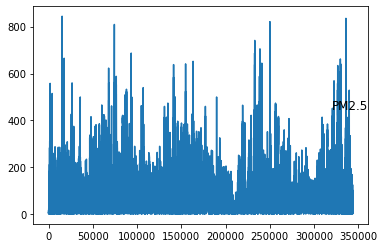

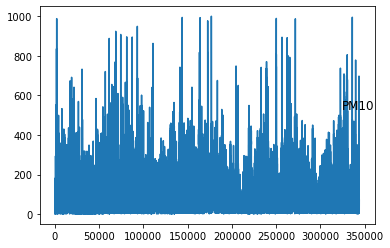

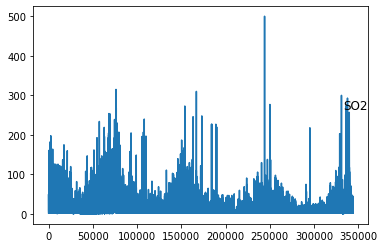

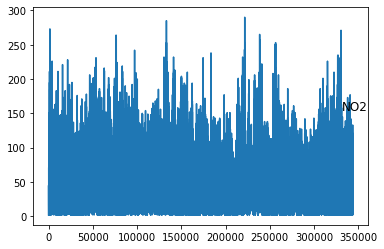

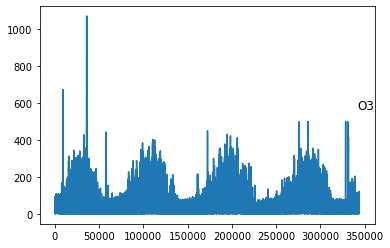

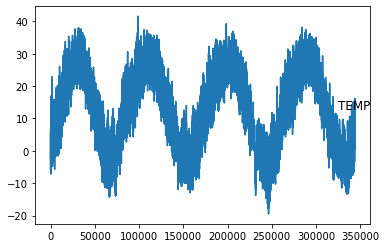

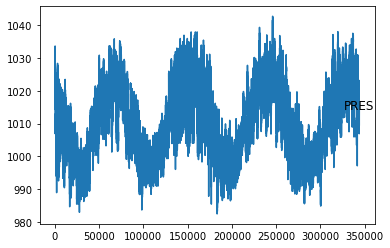

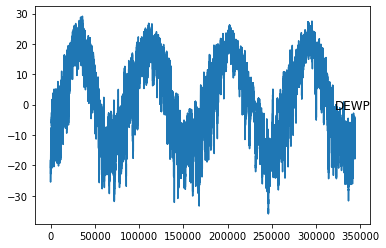

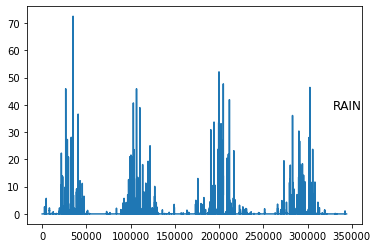

In [49]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9]
i = 1
# plot each column
for group in groups:
    pyplot.figure()
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

## Statistical Analaysis

### Data Summary

In [50]:
# Data summary

num_rel_cols = ["PM10",  "SO2",  "NO2",  "CO",  "O3",  "TEMP",  "PRES",  "DEWP",  "RAIN",  "WSPM"]

df[num_rel_cols].describe()

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,343946.000000,343946.000000,343946.000000,343946.000000,343946.000000,343946.000000,343946.000000,343946.000000,343946.000000,343946.000000
mean,104.555073,15.628870,50.559578,1229.810223,57.381166,13.511584,1010.823904,2.408220,0.064669,1.738904
std,91.402798,21.277936,35.054046,1157.956986,56.750535,11.427348,10.450925,13.796311,0.817904,1.241104
min,2.000000,0.285600,2.000000,100.000000,0.214200,-19.500000,982.400000,-36.000000,0.000000,0.000000
25%,36.000000,2.000000,23.000000,500.000000,10.710000,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,2.900000,0.000000,1.400000
75%,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Outliers

In [51]:
# Detecting Outliers

z = np.abs(stats.zscore(df["PM10"]))
print(z)
threshold = 3
print(np.where(z > 3))
print(min(z))

[1.06731103 1.10013283 1.07825163 ... 0.83755843 0.84849903 0.36711264]
(array([  1365,   1388,   1487, ..., 339847, 339849, 343604], dtype=int64),)
0.0016965968106193066


In [53]:
# Remove Outliers

cleaned_df = df[(np.abs(stats.zscore(df[num_rel_cols])) < 3).all(axis=1)]
n_before_removal = df.shape[0]
n_after_removal = cleaned_df.shape[0]
n_removed_rows = n_before_removal - n_after_removal
print(n_removed_rows, 'were dropped as outliers')

30627 were dropped as outliers


### Correlation Matrix

In [54]:
# Correlation matrix
corr = cleaned_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1,0.881765,0.447881,0.599087,0.755326,-0.125682,-0.0408876,-0.0522144,0.197893,-0.0280668,-0.279581
PM10,0.881765,1,0.45257,0.627188,0.677287,-0.0952504,-0.00671779,-0.0893605,0.155396,-0.0535126,-0.222373
SO2,0.447881,0.45257,1,0.477114,0.551941,-0.158489,-0.333624,0.234932,-0.294727,-0.0758614,-0.0803222
NO2,0.599087,0.627188,0.477114,1,0.673011,-0.499503,-0.22523,0.140917,0.00740351,-0.0526482,-0.403767
CO,0.755326,0.677287,0.551941,0.673011,1,-0.3443,-0.283161,0.154415,-0.00248279,-0.00609414,-0.326771
O3,-0.125682,-0.0952504,-0.158489,-0.499503,-0.3443,1,0.579129,-0.427978,0.286658,-0.0139979,0.323228
TEMP,-0.0408876,-0.00671779,-0.333624,-0.22523,-0.283161,0.579129,1,-0.811229,0.823601,0.0228394,0.023502
PRES,-0.0522144,-0.0893605,0.234932,0.140917,0.154415,-0.427978,-0.811229,1,-0.754398,-0.0505232,0.0958091
DEWP,0.197893,0.155396,-0.294727,0.00740351,-0.00248279,0.286658,0.823601,-0.754398,1,0.112418,-0.300239
RAIN,-0.0280668,-0.0535126,-0.0758614,-0.0526482,-0.00609414,-0.0139979,0.0228394,-0.0505232,0.112418,1,-0.0206865


## Save Cleansed Dataset

In [55]:
cleaned_df.to_csv(path + 'cleansed_air_quality.csv')